In [2]:
import numpy as np
import numba
import matplotlib.pyplot as plt
%matplotlib notebook

In [63]:
@numba.njit
def binary_search(x1, x2, err_bnd):
    f1 = f(x1)
    f2 = f(x2)
    xn = x2
    cnt = 0.
    while np.abs(x1 - x2) > err_bnd:
        xn = .5*(x1 + x2)
        fn = f(xn)
        if fn == 0.:
            break
        if fn*f1 > 0:
            x1 = xn
        else:
            x2 = xn
        cnt += 1.
    return xn, cnt     

@numba.njit
def f(x): return np.exp(-x) - .25

<IPython.core.display.Javascript object>


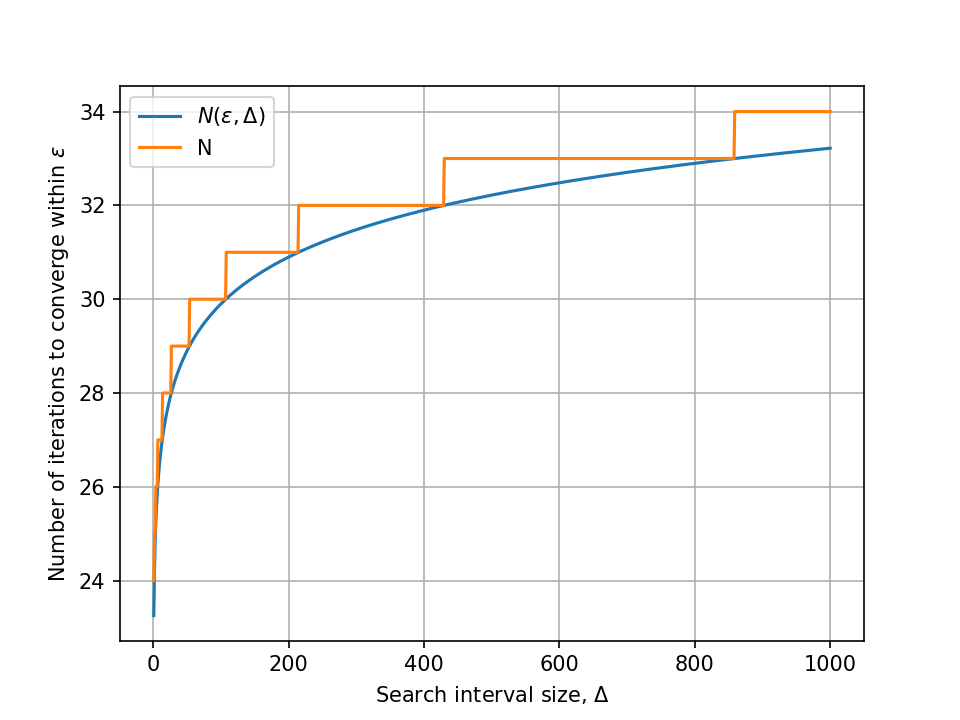

In [66]:
fig, ax = plt.subplots()
d = np.linspace(1,1000,1000)

e = 1e-7
ax.plot(d, np.log2(d/e), label=r"$N(\epsilon, \Delta)$")
y= [binary_search(-1.*D/2, 1.*D/2, e) for D in d]
ax.plot(d, [i[1] for i in y], label="N")
ax.grid()
ax.legend()
ax.set_ylabel(r"Number of iterations to converge within $\epsilon$")
ax.set_xlabel(r"Search interval size, $\Delta$")